In [37]:
import pandas as pd

# Load dataset
data_path = '../data/recipeNLG_raw.csv'
df = pd.read_csv(data_path)

# Display basic information
print(df.head())  # First 5 rows
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics


   Unnamed: 0                  title  \
0           0    No-Bake Nut Cookies   
1           1  Jewell Ball'S Chicken   
2           2            Creamy Corn   
3           3          Chicken Funny   
4           4   Reeses Cups(Candy)     

                                         ingredients  \
0  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  ["1 small jar chipped beef, cut up", "4 boned ...   
2  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4  ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine all ingredients. C...   
3  ["Boil and debone chicken.", "Put bite size pi...   
4  ["Combine first four ingredients and press in ...   

                                              link    source  \
0   www.cookbooks.com

In [38]:
print(df.isnull().sum())


Unnamed: 0     0
title          1
ingredients    0
directions     0
link           0
source         0
NER            0
dtype: int64


In [39]:
print(df.columns)


Index(['Unnamed: 0', 'title', 'ingredients', 'directions', 'link', 'source',
       'NER'],
      dtype='object')


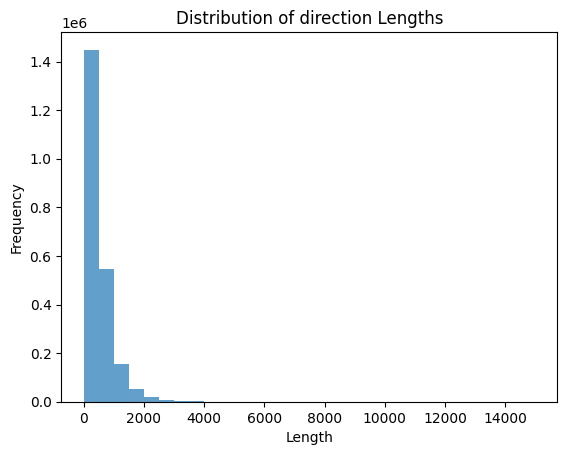

count    2.231142e+06
mean     5.051099e+02
std      4.524093e+02
min      5.000000e+00
25%      2.210000e+02
50%      3.710000e+02
75%      6.410000e+02
max      1.497900e+04
Name: directions_length, dtype: float64


In [40]:
import matplotlib.pyplot as plt

# Distribution of instruction lengths
df['directions_length'] = df['directions'].str.len()
plt.hist(df['directions_length'], bins=30, alpha=0.7)
plt.title('Distribution of direction Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Basic statistics for ingredient lengths
print(df['directions_length'].describe())

directions_length (Instruction Lengths)

    Count: 2,231,142 (No missing values—good!)
    Mean: 505 characters.
    Std: 452 characters (indicating variability in instruction lengths).
    Min: 5 characters (very short instructions).
    Max: 14,979 characters (likely outliers with verbose instructions).

In [41]:
df['directions'] = df['directions'].fillna('')

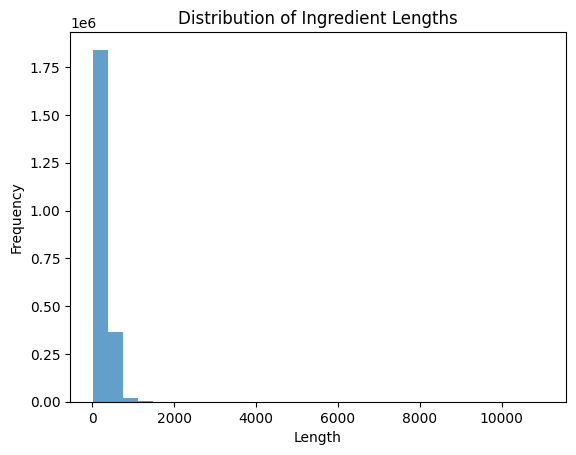

count    2.231142e+06
mean     2.589440e+02
std      1.457037e+02
min      5.000000e+00
25%      1.590000e+02
50%      2.250000e+02
75%      3.240000e+02
max      1.101800e+04
Name: ingredients_length, dtype: float64


In [42]:
# Distribution of ingredient lengths
df['ingredients_length'] = df['ingredients'].str.len()
plt.hist(df['ingredients_length'], bins=30, alpha=0.7)
plt.title('Distribution of Ingredient Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Basic statistics for ingredient lengths
print(df['ingredients_length'].describe())

ingredients_length (Ingredients Lengths)

    Count: 2,231,142 (No missing values—great!).
    Mean: ~259 characters.
    Std: ~145 characters (less variable than directions).
    Min: 5 characters.
    Max: 11,018 characters (likely outliers with extensive ingredient lists).

In [8]:
df['ingredients'] = df['ingredients'].fillna('')

Visualize Outliers: Plot the distributions for directions_length and ingredients_length to identify outliers.

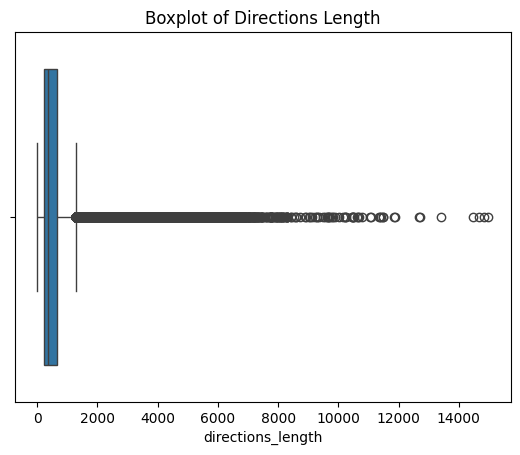

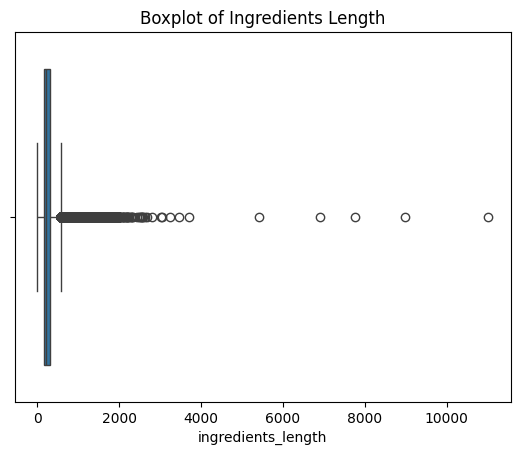

In [43]:
import seaborn as sns

# Directions length distribution
sns.boxplot(x=df['directions_length'])
plt.title('Boxplot of Directions Length')
plt.show()

# Ingredients length distribution
sns.boxplot(x=df['ingredients_length'])
plt.title('Boxplot of Ingredients Length')
plt.show()


In [44]:
directions_threshold = df['directions_length'].quantile(0.99)
ingredients_threshold = df['ingredients_length'].quantile(0.99)

df_cleaned_99 = df[
    (df['directions_length'] <= directions_threshold) &
    (df['ingredients_length'] <= ingredients_threshold)
]

print(f"Rows after outlier removal: {df_cleaned_99.shape[0]}")


Rows after outlier removal: 2191821


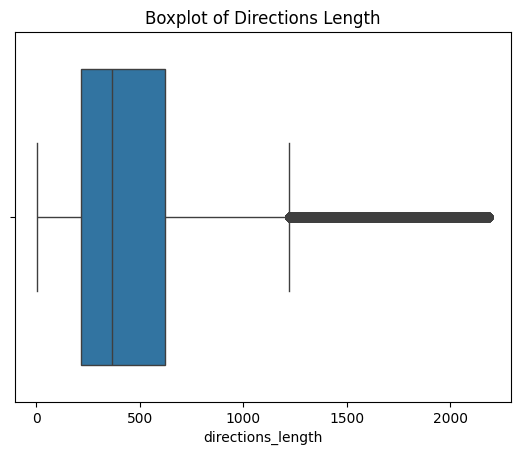

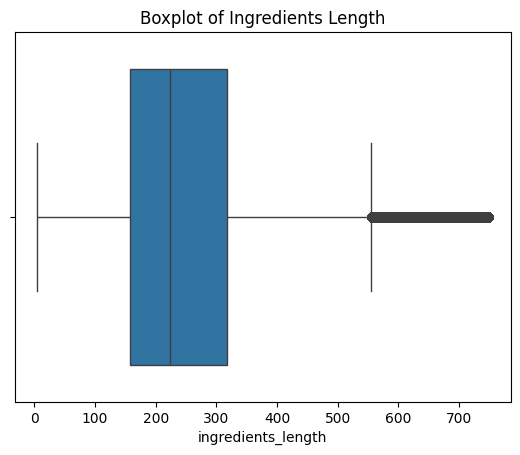

In [45]:
import seaborn as sns

# Directions length distribution
sns.boxplot(x=df_cleaned_99['directions_length'])
plt.title('Boxplot of Directions Length')
plt.show()

# Ingredients length distribution
sns.boxplot(x=df_cleaned_99['ingredients_length'])
plt.title('Boxplot of Ingredients Length')
plt.show()

In [12]:
# Before outlier removal
print(" Directions - Before Outlier Removal:")
print(df['directions_length'].describe())

print("\n Directions - After Outlier Removal:")
print(df_cleaned_99['directions_length'].describe())


 Directions - Before Outlier Removal:
count    2.231142e+06
mean     5.051099e+02
std      4.524093e+02
min      5.000000e+00
25%      2.210000e+02
50%      3.710000e+02
75%      6.410000e+02
max      1.497900e+04
Name: directions_length, dtype: float64

 Directions - After Outlier Removal:
count    2.191821e+06
mean     4.744688e+02
std      3.663645e+02
min      5.000000e+00
25%      2.180000e+02
50%      3.640000e+02
75%      6.200000e+02
max      2.184000e+03
Name: directions_length, dtype: float64


In [15]:
# Fill missing titles with a placeholder
df['title'].fillna('Unknown Title', inplace=True)


/tmp/ipykernel_583/2594159756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('Unknown Title', inplace=True)


In [46]:
"""Clean and standardize the ingredients column."""
# Remove duplicates
df['ingredients'] = df['ingredients'].apply(lambda x: ', '.join(sorted(set(str(x).split(', ')))))
    
# Handle missing values
df['ingredients'] = df['ingredients'].fillna('unknown')


In [47]:
# Remove leading/trailing spaces
df['directions'] = df['directions'].str.strip()

# Remove missing instructions
df = df.dropna(subset=['directions'])

# Fix formatting issues (e.g., replace newlines)
df['directions'] = df['directions'].str.replace('\n', ' ', regex=True)


In [48]:
#Explore quantile(0.95) for Comparison

quantile_95 = df['directions_length'].quantile(0.95)
df_clipped_95 = df[df['directions_length'] <= quantile_95]

print(df_clipped_95['directions_length'].describe())

count    2.119676e+06
mean     4.315581e+02
std      2.893904e+02
min      5.000000e+00
25%      2.140000e+02
50%      3.530000e+02
75%      5.840000e+02
max      1.354000e+03
Name: directions_length, dtype: float64


In [49]:

# Compare dataset sizes
print("Rows with 95th Percentile:", df_clipped_95.shape[0])
print("Rows with 99th Percentile:", df_cleaned_99.shape[0])


Rows with 95th Percentile: 2119676
Rows with 99th Percentile: 2191821


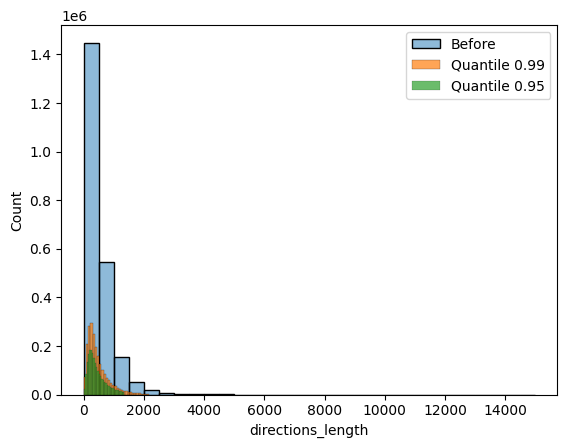

In [50]:
import seaborn as sns
sns.histplot(df['directions_length'], bins=30, alpha=0.5, label='Before')
sns.histplot(df_cleaned_99['directions_length'], bins=30, alpha=0.7, label='Quantile 0.99')
sns.histplot(df_clipped_95['directions_length'], bins=30, alpha=0.7, label='Quantile 0.95')
plt.legend()
plt.show()


###Project Goal: To build a generalized model that accounts for various recipe complexities, hence choosing quantile 0.99. If you want a cleaner dataset with minimal noise, opt for quantile 0.95.
Model Robustness: If you plan to use robust NLP models like Transformers or fine-tune GPT-2, they can handle the variability of quantile 0.99 well.
Compute Resources: Larger datasets require more computational power. If compute is a limitation, quantile 0.95 might be a better choice.

In [51]:
selected_quantile = 0.99

In [52]:
if selected_quantile == 0.99:
    df_final = df_cleaned_99
else:
    df_final = df_clipped_95

df_final.to_csv('../data/processed/recipeNLG_final.csv', index=False)
print("Final dataset saved.")


Final dataset saved.


In [53]:
empty_ingredients = df_final[df_final['ingredients'].apply(lambda x: len(eval(x)) == 0)]
empty_directions = df_final[df_final['directions'].apply(lambda x: len(eval(x)) == 0)]

print("Rows with empty ingredients:", empty_ingredients.shape[0])
print("Rows with empty directions:", empty_directions.shape[0])



Rows with empty ingredients: 0
Rows with empty directions: 0
